In [13]:
import pandas as pd
import numpy as np

# Step 1: Load the dataset
df = pd.read_csv('CarPrice.csv')


# Step 2: Show first 5 rows
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
# Step 3.1: Drop 'car_ID' and 'CarName'
df.drop(['car_ID', 'CarName'], axis=1, inplace=True)

# Step 3.2: Convert categorical variables to dummy/one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Step 3.3: Preview final cleaned dataset
df.head()


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,True,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,True,False,False


In [15]:
from sklearn.model_selection import train_test_split

# Step 4.1: Define X and y
X = df.drop('price', axis=1)
y = df['price']

# Step 4.2: Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (164, 43)
X_test shape: (41, 43)
y_train shape: (164,)
y_test shape: (41,)


In [16]:
from sklearn.linear_model import LinearRegression

# Step 5: Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Step 6.1: Predict on test data
y_pred = model.predict(X_test)

# Step 6.2: Evaluate
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R2 Score: 0.892556670032025
RMSE: 2912.3887934772315


c:\Users\ujjval sharma\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


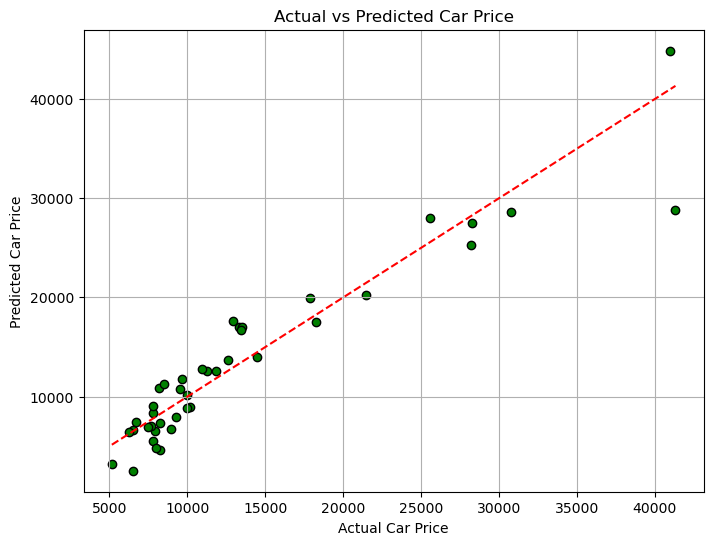

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='green', edgecolors='black')
plt.xlabel("Actual Car Price")
plt.ylabel("Predicted Car Price")
plt.title("Actual vs Predicted Car Price")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
plt.show()


In [19]:
import joblib

# Save model to a file
joblib.dump(model, 'car_price_model.pkl')


['car_price_model.pkl']